In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df=pd.read_csv("C:/Users/Pro/Downloads/covid.csv")

df1.sample(3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22032 entries, 0 to 22031
Data columns (total 6 columns):
Id                22032 non-null int64
Province_State    9360 non-null object
Country_Region    22032 non-null object
Date              22032 non-null object
ConfirmedCases    22032 non-null float64
Fatalities        22032 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [61]:
df["Date"]= pd.to_datetime(df["Date"]) 
df.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [62]:
df.isnull().sum()

Id                    0
Province_State    12672
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [63]:
df.drop(df[['Id','Province_State']], axis=1, inplace=True) # deleting
df.sample(5)

,Country_Region,Date,ConfirmedCases,Fatalities
5415,China,2020-02-06,40.0,0.0
7727,Eritrea,2020-02-14,0.0,0.0
314,Angola,2020-02-17,0.0,0.0
21948,Zambia,2020-03-22,3.0,0.0
2515,Burma,2020-03-29,10.0,0.0


In [64]:
df.isnull().sum()

Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

In [65]:
df.shape

(22032, 4)

In [66]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 1 categorical variables
['Country_Region']


In [67]:
numeric = [num for num in df.columns if df[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))
numeric

There are 3 numeric variables


['Date', 'ConfirmedCases', 'Fatalities']

In [129]:
# let's inspect at the number of cases
print ('unique values in "Date" variable: ', len(df['Date'].value_counts()))
print ('unique values in "ConfirmedCases" variable: ', len(df['ConfirmedCases'].value_counts()))
print ('unique values in "Fatalities" variable: ', len(df['Fatalities'].value_counts()))


unique values in "Date" variable:  72
unique values in "ConfirmedCases" variable:  1687
unique values in "Fatalities" variable:  376


In [70]:
# continous variables 
continuous = [var for var in numeric if var not in discrete]
continuous

['Date', 'ConfirmedCases', 'Fatalities']

In [130]:
# let's visualise the values of the categorical variables
for var in categorical:
    print(var, ' values: ', df[var].unique())

Country_Region  values:  ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamai

In [73]:
# most frequent

Country_Region= df['Country_Region'].value_counts()
Country_Region.head(10)

US                3888
China             2376
Canada             864
France             720
United Kingdom     720
Australia          576
Netherlands        288
Denmark            216
Estonia             72
Cote d'Ivoire       72
Name: Country_Region, dtype: int64

In [75]:
# let's have a look at the confimed cases > 10
df[df.ConfirmedCases>10]


,Country_Region,Date,ConfirmedCases,Fatalities
52,Afghanistan,2020-03-14,11.0,0.0
53,Afghanistan,2020-03-15,16.0,0.0
54,Afghanistan,2020-03-16,21.0,0.0
55,Afghanistan,2020-03-17,22.0,0.0
56,Afghanistan,2020-03-18,22.0,0.0
57,Afghanistan,2020-03-19,22.0,0.0
58,Afghanistan,2020-03-20,24.0,0.0
59,Afghanistan,2020-03-21,24.0,0.0
60,Afghanistan,2020-03-22,40.0,1.0
61,Afghanistan,2020-03-23,40.0,1.0


In [76]:
groupedby_Date = df.groupby('Date')
groupedby_country = df.groupby('Country_Region')
groupedby_ConfirmedCases = df.groupby('ConfirmedCases')
groupedby_Fatalities = df.groupby('Fatalities')


In [77]:
#Visualize the confirmed cases by Country
country_country = groupedby_country.get_group('China')
country_country[['ConfirmedCases','Date', 'Fatalities',]]

,ConfirmedCases,Date,Fatalities
3888,1.0,2020-01-22,0.0
3889,9.0,2020-01-23,0.0
3890,15.0,2020-01-24,0.0
3891,39.0,2020-01-25,0.0
3892,60.0,2020-01-26,0.0
3893,70.0,2020-01-27,0.0
3894,106.0,2020-01-28,0.0
3895,152.0,2020-01-29,0.0
3896,200.0,2020-01-30,0.0
3897,237.0,2020-01-31,0.0


In [78]:
#Visualize the confirmed cases by Country
country_country = groupedby_country.get_group('India')
country_country[['Date','ConfirmedCases','Fatalities',]]

,Date,ConfirmedCases,Fatalities
10008,2020-01-22,0.0,0.0
10009,2020-01-23,0.0,0.0
10010,2020-01-24,0.0,0.0
10011,2020-01-25,0.0,0.0
10012,2020-01-26,0.0,0.0
10013,2020-01-27,0.0,0.0
10014,2020-01-28,0.0,0.0
10015,2020-01-29,0.0,0.0
10016,2020-01-30,1.0,0.0
10017,2020-01-31,1.0,0.0


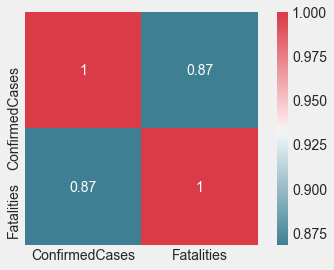

In [139]:
# let's make boxplots to visualise outliers in the continuous variables 
f, ax = plt.subplots(figsize=(6, 4))
corr = df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,
            square=True, ax=ax)

Text(0, 0.5, 'ConfirmedCases')

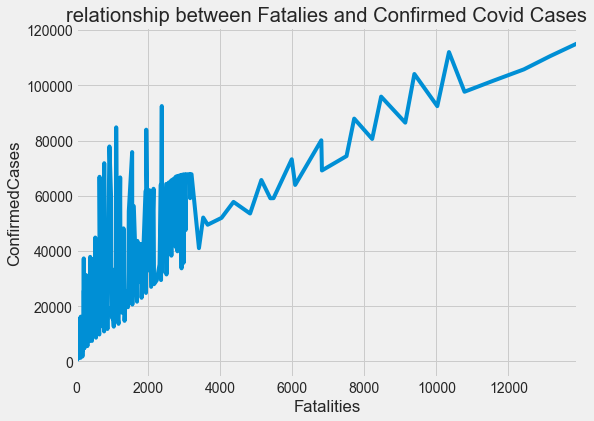

In [145]:

fig = plt.figure(figsize=(8, 6))
fig = df.groupby(['Fatalities'])['ConfirmedCases'].mean().plot()
fig.set_title('relationship between Fatalities and Confirmed Covid Cases')
fig.set_ylabel('ConfirmedCases')

Text(0.5, 1.0, 'Boxplot, Covid confimed cased by country')

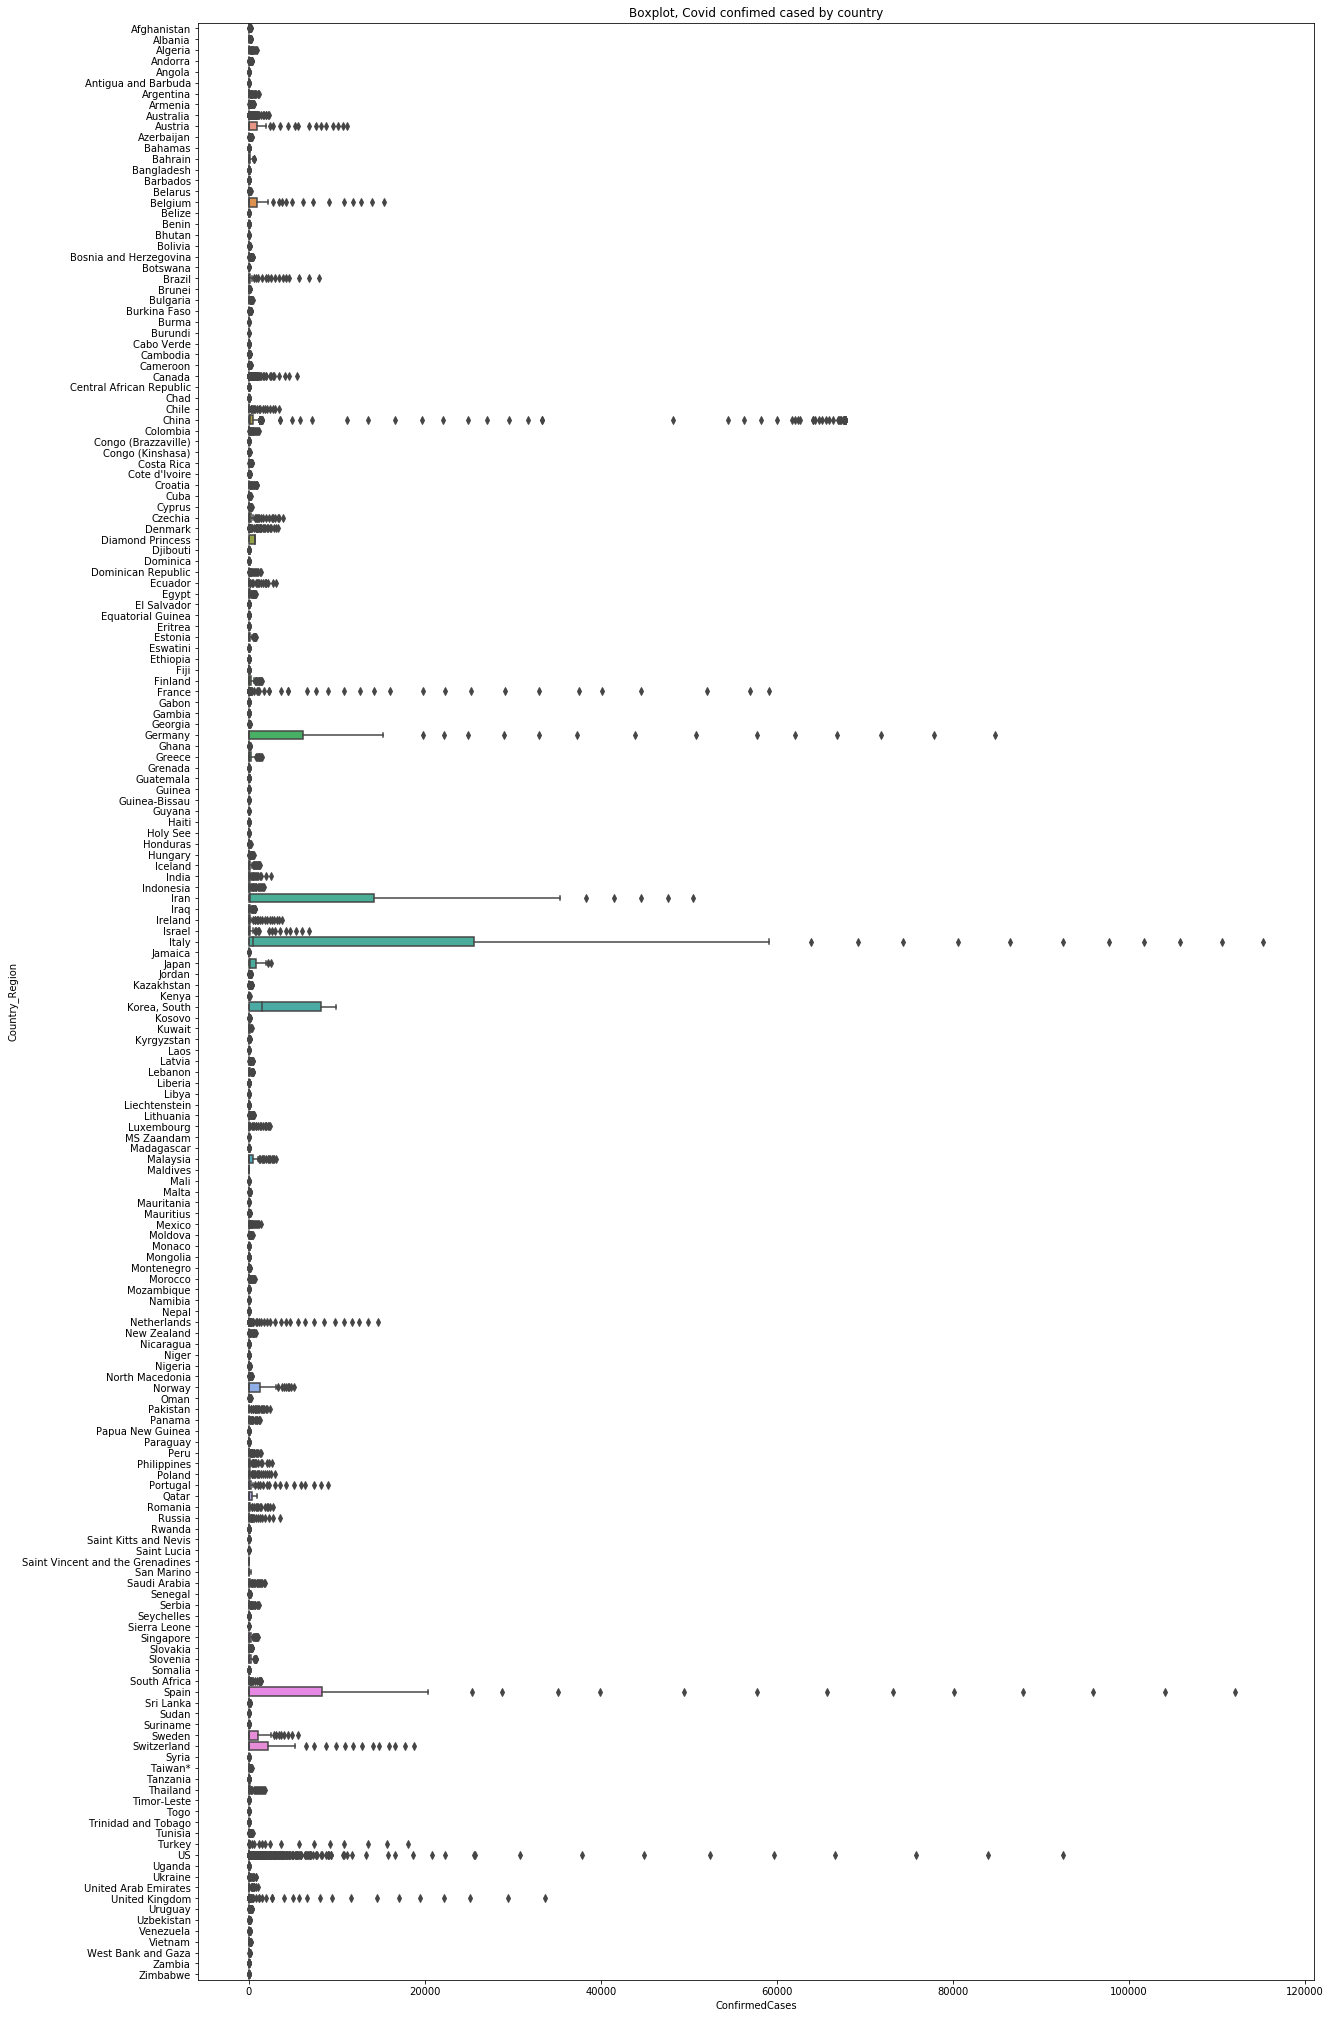

In [94]:
# 
fig, ax = plt.subplots(figsize=[20, 36])
sns.boxplot(
    data=df,
    y='Country_Region',
    x='ConfirmedCases'
)
ax.set_title('Boxplot, Covid confimed cased by country')

In [107]:
#selected few countries for the study
d1=df[(df['Country_Region']=='Canada')|(df['Country_Region']=='Australia')|(df['Country_Region']=='France')|
    (df['Country_Region']=='China')|(df['Country_Region']=='Spain')|(df['Country_Region']=='US')|
     (df['Country_Region']=='Italy')|(df['Country_Region']=='Switzerland')|(df['Country_Region']=='United Kingdom')]
d1.shape

(9360, 4)

In [109]:
d1.sample(10)

,Country_Region,Date,ConfirmedCases,Fatalities
4977,China,2020-01-31,20.0,0.0
18793,US,2020-01-23,0.0,0.0
4730,China,2020-03-12,1273.0,22.0
5683,China,2020-03-29,772.0,7.0
2832,Canada,2020-02-15,0.0,0.0
5678,China,2020-03-24,768.0,7.0
19153,US,2020-01-23,0.0,0.0
703,Australia,2020-03-17,210.0,4.0
16753,US,2020-03-11,0.0,0.0
15691,Spain,2020-03-29,80110.0,6803.0


Text(0, 0.5, 'ConfirmedCases')

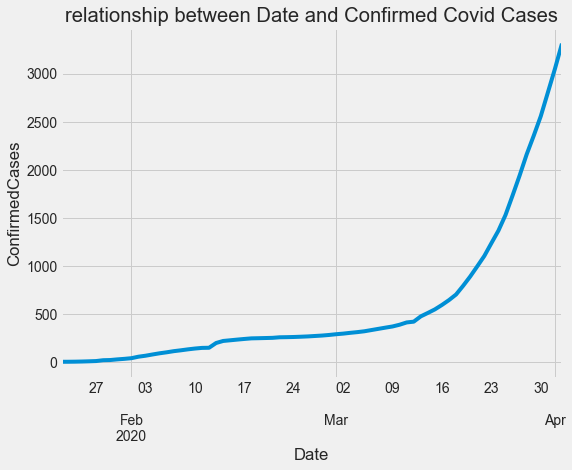

In [146]:

fig = plt.figure(figsize=(8, 6))
fig = df.groupby(['Date'])['ConfirmedCases'].mean().plot()
fig.set_title('relationship between Date and Confirmed Covid Cases')
fig.set_ylabel('ConfirmedCases')

Text(0.5, 1.0, 'Boxplot, Covid confimed cased by few selected countries')

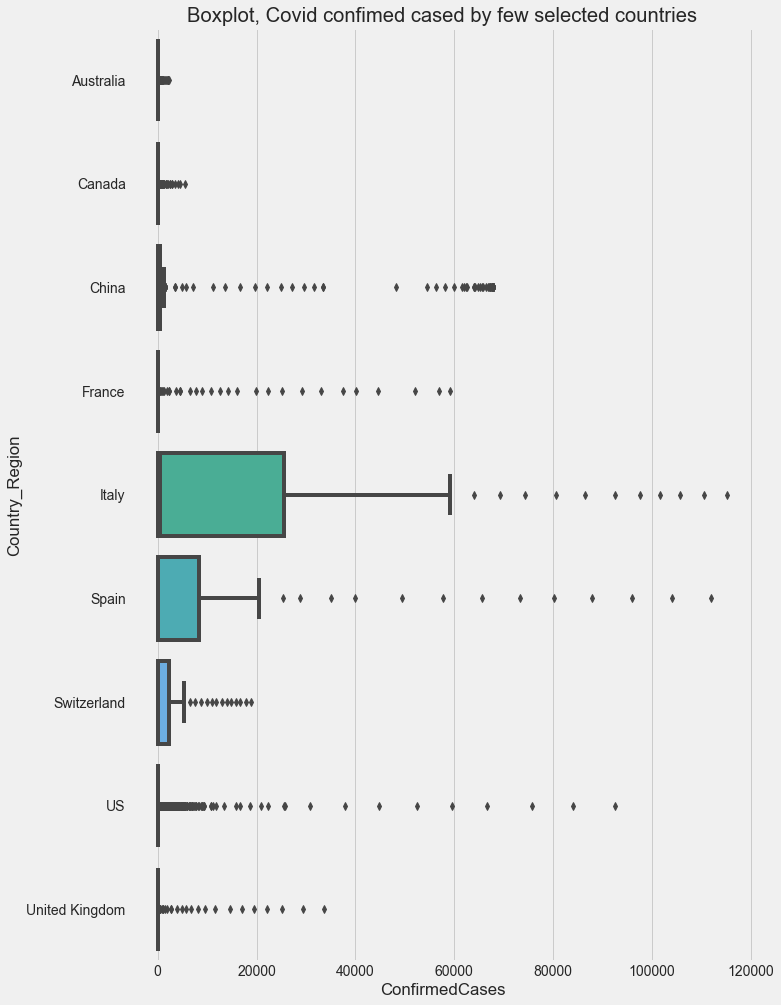

In [143]:
# 
fig, ax = plt.subplots(figsize=[10, 16])
sns.boxplot(
    data=d1,
    y='Country_Region',
    x='ConfirmedCases'
)
ax.set_title('Boxplot, Covid confimed cased by few selected countries')

Text(0.5, 1.0, 'Boxplot, Confirmed Cases by Country')

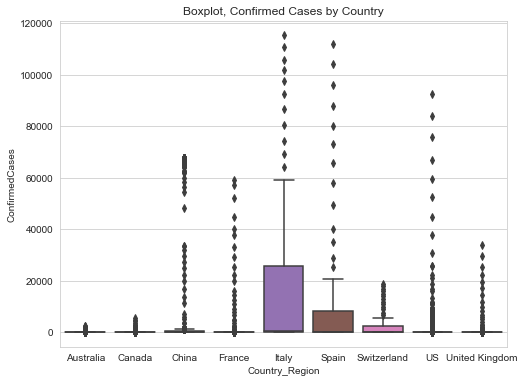

In [114]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.boxplot(
    data=d1,
    y='ConfirmedCases',
    x='Country_Region'
)
ax.set_title('Boxplot, Confirmed Cases by Country')

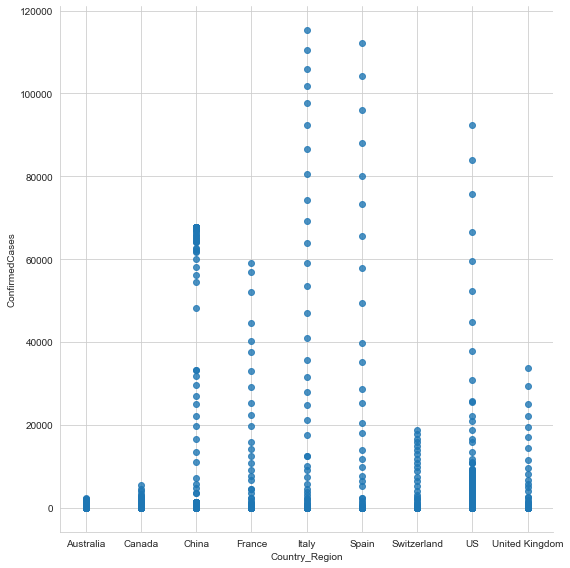

In [120]:
sns.lmplot(x='Country_Region', y='ConfirmedCases', data=d1, fit_reg=False,  height=8, aspect=1)
plt.show()